$\newcommand{L}[1]{\| #1 \|}\newcommand{VL}[1]{\L{ \vec{#1} }}\newcommand{R}[1]{\operatorname{Re}\,(#1)}\newcommand{I}[1]{\operatorname{Im}\, (#1)}$

## Testing a single voxel

In [1]:
%matplotlib inline

A short while ago (Modeling a single voxel), we were modeling a single voxel time
course.

Let’s get that same voxel time course back again:

In [2]:
import numpy as np
import matplotlib.pyplot as plt
# Print array values to 4 decimal places
np.set_printoptions(precision=4)

In [3]:
import nibabel as nib
img = nib.load('ds114_sub009_t2r1.nii')
data = img.get_data()
data = data[..., 4:]

The voxel coordinate (3D coordinate) that we were looking at in
Voxel time courses was at (42, 32, 19):

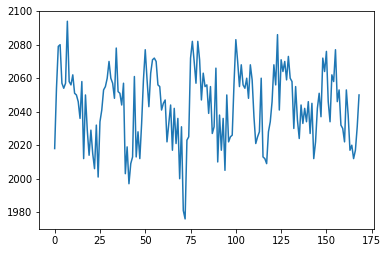

In [4]:
voxel_time_course = data[42, 32, 19]
plt.plot(voxel_time_course)

We then compiled a design for this time-course and estimated it.

We used the `convolved regressor` from
Convolving with the hemodyamic response function in a simple regression.

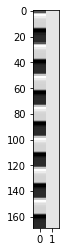

In [5]:
convolved = np.loadtxt('ds114_sub009_t2r1_conv.txt')
# Knock off first 4 elements to match data
convolved = convolved[4:]
N = len(convolved)
X = np.ones((N, 2))
X[:, 0] = convolved
plt.imshow(X, interpolation='nearest', cmap='gray', aspect=0.1)

$\newcommand{\yvec}{\vec{y}}$
$\newcommand{\xvec}{\vec{x}}$
$\newcommand{\evec}{\vec{\varepsilon}}$
$\newcommand{Xmat}{\boldsymbol X} \newcommand{\bvec}{\vec{\beta}}$
$\newcommand{\bhat}{\hat{\bvec}} \newcommand{\yhat}{\hat{\yvec}}$

As you will remember from [introduction to the general linear model](https://matthew-brett.github.io/teaching/glm_intro.html), our
model is:

$$
\yvec = \Xmat \bvec + \evec
$$

We can get our least squares parameter *estimates* for $\bvec$ with:

$$
\bhat = \Xmat^+y
$$

where $\Xmat^+$ is the *pseudoinverse* of $\Xmat$.  When $(\Xmat^T \Xmat)$ is
invertible, the pseudoinverse is given by:

$$
\Xmat^+ = (\Xmat^T \Xmat)^{-1} \Xmat^T
$$

We find the $\bhat$ for our data and design:

In [6]:
import numpy.linalg as npl
Xp = npl.pinv(X)
beta_hat = Xp.dot(voxel_time_course)
beta_hat

array([   31.1855,  2029.3677])

Our plan now is to do an hypothesis test on our $\bhat$ values.

The $\bhat$ values are sample estimates of the unobservable true $\bvec$
parameters.

Because the $\bhat$ values are sample estimates, the values we have depend on
the particular sample we have, and the particular instantiation of the random
noise (residuals).   If we were to take another set of data from the same
voxel during the same task, we would get another estimate, because there would
be different instantiation of the random noise.  It’s possible to show that
the variance / covariance of the $\hat\beta$ estimates is:

$$
\text{Cov}(\hat\beta) = \sigma^2 \left(X^T X\right)^{-1}.
$$

where $\sigma^2$ is the true unknown variance of the errors. See [wikipedia
proof](https://en.wikipedia.org/wiki/Proofs_involving_ordinary_least_squares#Unbiasedness_of_.CE.B2.CC.82),
and [stackoverflow proof](http://stats.stackexchange.com/questions/72940/covariance-matrix-of-least-squares-estimator-hat-beta).

We can use an estimate $\hat\sigma^2$ of $\sigma^2$ to give us estimated
standard errors of the variance covariance (see: Unbiased estimate of population variance):

In [7]:
y = voxel_time_course
y_hat = X.dot(beta_hat)
residuals = y - y_hat
# Residual sum of squares
RSS = np.sum(residuals ** 2)
# Degrees of freedom: n - no independent columns in X
df = X.shape[0] - npl.matrix_rank(X)
# Mean residual sum of squares
MRSS = RSS / df
# This is our s^2
s2_hat = MRSS
print(s2_hat)
print(np.sqrt(s2_hat))

247.937570963
15.7460334994


We now have an standard estimate of the variance / covariance of the $\bhat$:

In [8]:
v_cov = s2_hat * npl.inv(X.T.dot(X))

In particular, I can now divide my estimate for the first parameter, by the
standard error of that estimate:

In [9]:
numerator = beta_hat[0]
denominator = np.sqrt(v_cov[0, 0])
t_stat = numerator / denominator
print(t_stat)

12.826780099


I can look up the probability of this t statistic using `scipy.stats`:

In [10]:
from scipy.stats import t as t_dist
# Get p value for t value using cumulative density dunction
# (CDF) of t distribution
ltp = t_dist.cdf(t_stat, df) # lower tail p
p = 1 - ltp # upper tail p
p

0.0

## Compare our manual estimation to R

Finally let’s save the voxel time course for us to compare this analysis to
the `lm` estimation in R:

In [11]:
np.savetxt('voxel_time_course.txt', voxel_time_course)

Here are the commands to run the same analysis in R:

```
# Simple regression model in R
# Load the voxel time course
voxels = read.table('voxel_time_course.txt')$V1
# Load the convolved regressor
convolved = read.table('ds114_sub009_t2r1_conv.txt')$V1
# Drop the first four values to correspond to the data
convolved = convolved[-(1:4)]
# Fit linear model
res = lm(voxels ~ convolved)
print(summary(res))
```

<!-- vim:ft=rst -->
<!-- Course -->
<!-- BIC -->
<!-- Python distributions -->
<!-- Version control -->
<!-- Editors -->
<!-- Python and common libraries -->
<!-- IPython -->
<!-- Virtualenv and helpers -->
<!-- Pypi and packaging -->
<!-- Mac development -->
<!-- Windows development -->
<!-- Nipy and friends -->
<!-- FMRI datasets -->
<!-- Languages -->
<!-- Imaging software -->
<!-- Installation -->
<!-- Tutorials -->
<!-- MB tutorials -->
<!-- Ideas -->
<!-- Psych-214 -->
<!-- People -->
<!-- Licenses -->
<!-- Neuroimaging stuff -->
<!-- OpenFMRI projects -->
<!-- Unix -->
<!-- Substitutions -->